In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='Email_Length', ylabel='Is_Spam'>

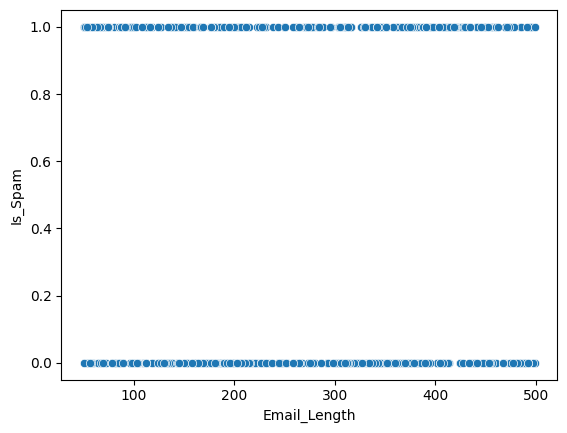

In [ ]:
df = pd.read_csv('./Data/classification_problem.csv')

sns.scatterplot(data=df, x="Email_Length", y="Is_Spam")
# plt.set_title("Scenario 6: Email Length vs Is Spam")

# Linear Regression is not appropriate here. The target variable Is_Spam is binary (0 or 1), indicating a classification problem, not regression. 

<Axes: xlabel='Education_Level', ylabel='Income_Lakh'>

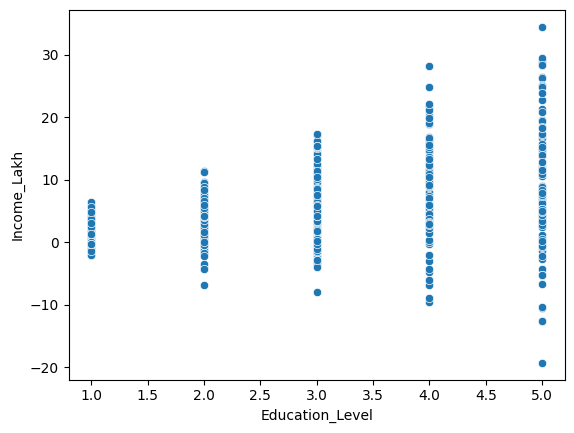

In [83]:
df = pd.read_csv('./heteroscedasticity.csv')

sns.scatterplot(data=df, x="Education_Level", y="Income_Lakh")



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

df = df[df['Income_Lakh'] > 0]
X = df[['Education_Level']]
y = df['Income_Lakh']
X = add_constant(X)

y_log = np.log(y)

model_log = sm.OLS(y_log, X).fit()

model_robust = sm.OLS(y, X).fit(cov_type='HC3')
print("\n--- Robust Regression Summary (HC3) ---")
print(model_robust.summary())

model = sm.OLS(y, X).fit()
bp_test = het_breuschpagan(model.resid, model.model.exog)

labels = ['Lagrange Multiplier Stat', 'p-value', 'f-value', 'f p-value']
result = dict(zip(labels, bp_test))

print("\n--- Breusch–Pagan Test Results ---")
for key, value in result.items():
    print(f"{key} : {value:.6f}")



--- Robust Regression Summary (HC3) ---
                            OLS Regression Results                            
Dep. Variable:            Income_Lakh   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     63.86
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           9.38e-15
Time:                        15:39:06   Log-Likelihood:                -1635.5
No. Observations:                 500   AIC:                             3275.
Df Residuals:                     498   BIC:                             3284.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
c

d:\case_study_ml\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


| Metric                         | Value / Interpretation                                                                                          |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------- |
| **R-squared**                  | 0.139 → `Education_Level` explains \~13.9% of income variability.                                               |
| **coef (Education\_Level)**    | 1.81 → Each level of education is associated with an increase of **1.81 lakh** in income, on average.           |
| **p-value (Education\_Level)** | < 0.001 → Statistically significant relationship.                                                               |
| **Robust Std Err (HC3)**       | Used to correct for heteroscedasticity → improves reliability of p-values and confidence intervals.             |
| **Omnibus / JB**               | Indicates **non-normality** in residuals (p ≪ 0.05).                                                            |
| **Durbin-Watson**              | \~1.95 → No major autocorrelation.                                                                              |
| **Conclusion**                 | Model accounts for heteroscedasticity but **residuals are still non-normal**, and **predictive power is weak**. |


| Metric         | Value                                                                          | Interpretation                                             |
| -------------- | ------------------------------------------------------------------------------ | ---------------------------------------------------------- |
| **LM stat**    | 84.89                                                                          | Large test statistic                                       |
| **p-value**    | ≈ 0.000000                                                                     | **Reject null hypothesis** → heteroscedasticity is present |
| **Conclusion** | Residual variance is **not constant** — violates linear regression assumptions |                                                            |


<Axes: xlabel='Experience', ylabel='Salary'>

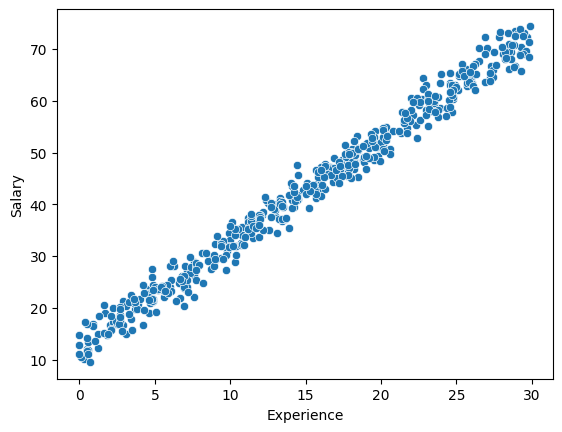

In [95]:
df = pd.read_csv('./multicollinearity.csv')

sns.scatterplot(data=df, x="Experience", y="Salary")


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['Experience', 'Age']]

X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,const,457.120750
1,Experience,70.556471
2,Age,70.556471


<Axes: xlabel='Time_hours', ylabel='Bacteria_Count'>

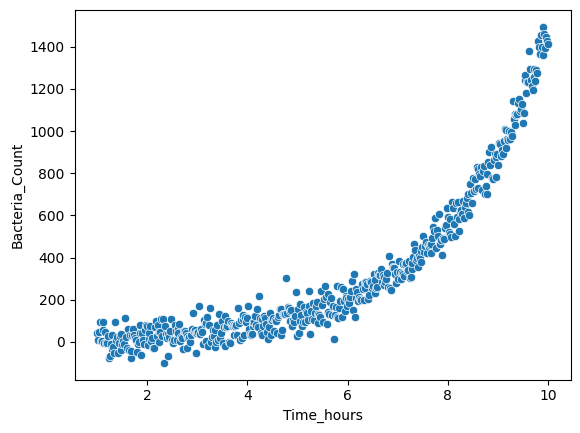

In [87]:
df = pd.read_csv('./nonlinear_exponential_growth.csv')

sns.scatterplot(data=df, x="Time_hours", y="Bacteria_Count")


<Axes: xlabel='Size_sqft', ylabel='Price_Lakh'>

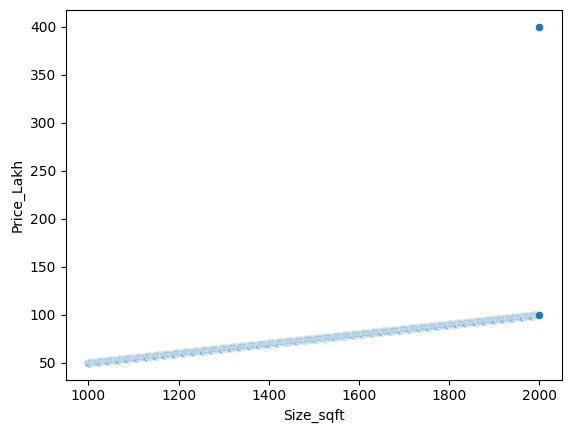

In [88]:
df = pd.read_csv('./outlier_impact.csv')

sns.scatterplot(data=df, x="Size_sqft", y="Price_Lakh")


<Axes: xlabel='Years_of_Experience', ylabel='Salary_LPA'>

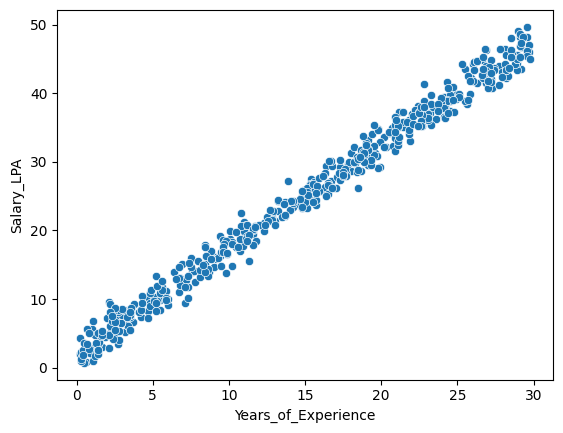

In [89]:
df = pd.read_csv('./scenario1_salary_vs_experience.csv')

sns.scatterplot(data=df, x="Years_of_Experience", y="Salary_LPA")


<Axes: xlabel='Years_of_Experience', ylabel='Salary_LPA'>

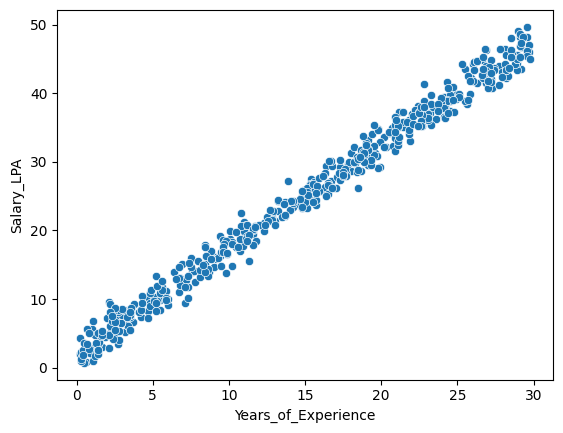

In [90]:
df = pd.read_csv('./scenario1_salary_vs_experience.csv')

sns.scatterplot(data=df, x="Years_of_Experience", y="Salary_LPA")


<Axes: xlabel='Size_sqft', ylabel='Price_Lakh'>

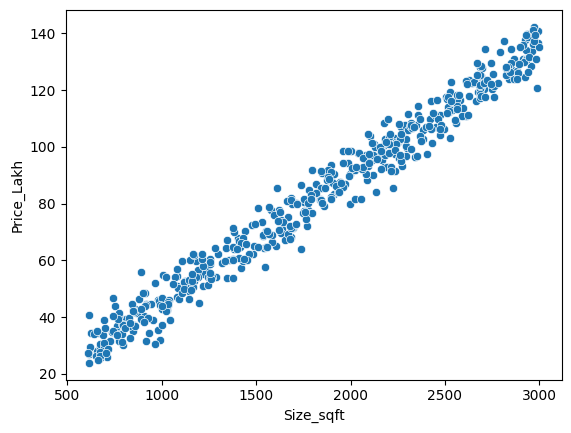

In [91]:
df = pd.read_csv('./scenario2_house_vs_size.csv')

sns.scatterplot(data=df, x="Size_sqft", y="Price_Lakh")

# clear positive linear relationship between house size (in sqft) and price.

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

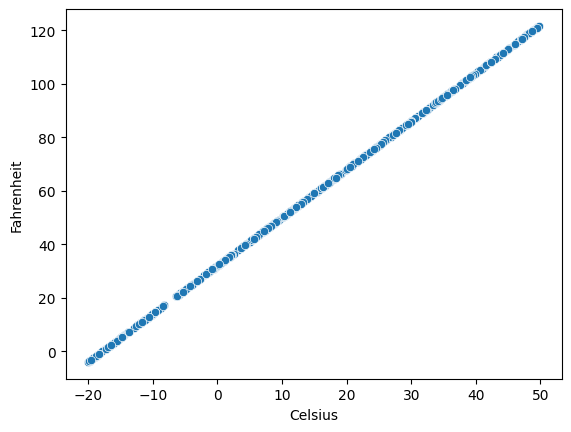

In [92]:
df = pd.read_csv('./scenario3_celsius_to_fahrenheit.csv')

sns.scatterplot(data=df, x="Celsius", y="Fahrenheit")

# Celsius and Fahrenheit is exactly linear by definition (F = 1.8 × C + 32),

<Axes: xlabel='Rainfall_mm', ylabel='Yield_kg_per_acre'>

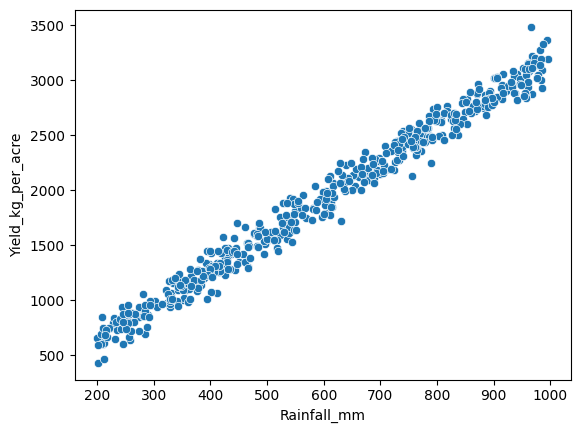

In [93]:
df = pd.read_csv('./scenario4_rainfall_vs_yield.csv')

sns.scatterplot(data=df, x="Rainfall_mm", y="Yield_kg_per_acre")

<Axes: xlabel='Ad_Spend_K', ylabel='Sales_K'>

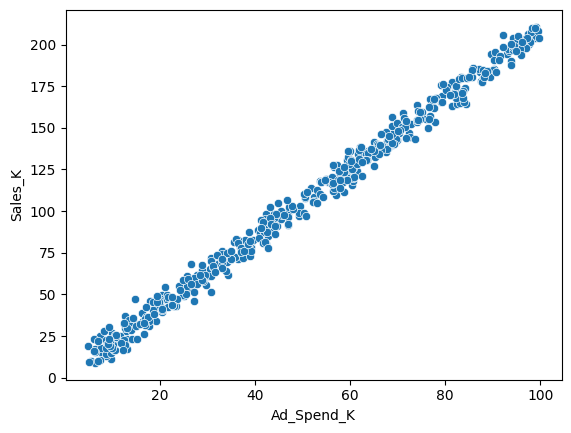

In [94]:
df = pd.read_csv('./scenario5_adspend_vs_sales.csv')

sns.scatterplot(data=df, x="Ad_Spend_K", y="Sales_K")

# clear positive trend where sales increase with higher ad spending.

| Scenario | Problem Description                             | Use Linear Regression? | Why / Why Not                                                     |
| -------- | ----------------------------------------------- | ---------------------- | ----------------------------------------------------------------- |
| **1**    | Salary vs. Experience                           | Yes                  | Clear linear relationship, assumptions likely met                 |
| **2**    | House Price vs. Size                            | Yes                  | Strong positive trend, assumptions mostly satisfied               |
| **3**    | Celsius vs. Fahrenheit                          | Yes                  | Perfect linear relationship (physical law)                        |
| **4**    | Rainfall vs. Crop Yield                         | No             | Non-linear (curve), linear regression is too simplistic           |
| **5**    | Ad Spend vs. Sales                              | Yes                  | Positive linear trend, good candidate                             |
| **6**    | Email Length vs. Spam (Binary target)           | No                   | Classification problem; use **logistic regression**               |
| **7**    | Education Level vs. Income (Heteroscedasticity) | No             | Variance increases with predictor; violates assumptions           |
| **8**    | Experience & Age vs. Salary (Multicollinearity) | No             | Multicollinearity inflates errors; needs resolution               |
| **9**    | Time vs. Bacteria Count (Exponential growth)    | No                   | Strong non-linearity; consider exponential or log transformation  |
| **10**   | Size vs. Price (With Outliers)                  | No             | Outliers can distort the fit; needs robust regression or cleaning |
